# Hierarchical clustering

In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import os

In [2]:
os.chdir("..")

In [3]:
from tp3 import EmbeddingsModel
my_model = EmbeddingsModel()

path = "saved_models/gensim_model_pretrainedGoogleNews-vectors-negative300.bin.model"
my_model.load_model(path)
vocab = list(my_model.get_vocab().keys())


2019-12-14 19:19:31,118 : INFO : loading Word2Vec object from saved_models/gensim_model_pretrainedGoogleNews-vectors-negative300.bin.model
2019-12-14 19:19:37,341 : INFO : loading wv recursively from saved_models/gensim_model_pretrainedGoogleNews-vectors-negative300.bin.model.wv.* with mmap=None
2019-12-14 19:19:37,342 : INFO : loading vectors from saved_models/gensim_model_pretrainedGoogleNews-vectors-negative300.bin.model.wv.vectors.npy with mmap=None
2019-12-14 19:19:44,158 : INFO : setting ignored attribute vectors_norm to None
2019-12-14 19:19:44,178 : INFO : loading vocabulary recursively from saved_models/gensim_model_pretrainedGoogleNews-vectors-negative300.bin.model.vocabulary.* with mmap=None
2019-12-14 19:19:44,179 : INFO : loading trainables recursively from saved_models/gensim_model_pretrainedGoogleNews-vectors-negative300.bin.model.trainables.* with mmap=None
2019-12-14 19:19:44,180 : INFO : loading syn1neg from saved_models/gensim_model_pretrainedGoogleNews-vectors-negat

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=False)
sub_vocab = vocab[:10000]
sub_embeddings = []
for sub in sub_vocab:
    sub_embeddings += [np.array(my_model.model.wv[sub])]
sub_embeddings = np.stack(sub_embeddings)

new_embeddings = pca.fit_transform(sub_embeddings)

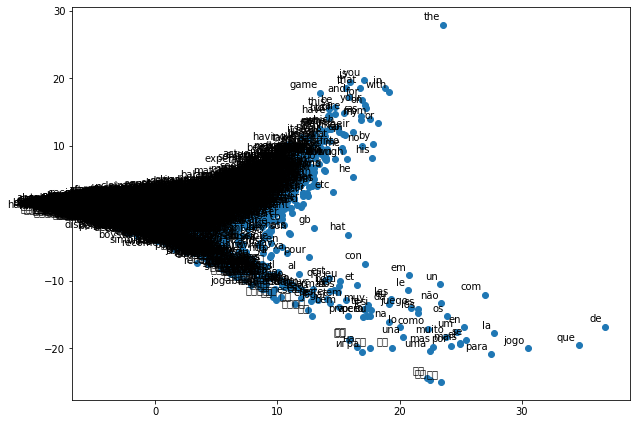

In [24]:
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(new_embeddings[:,0], new_embeddings[:,1], label='True Position')

for label, x, y in zip(sub_vocab, new_embeddings[:, 0], new_embeddings[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

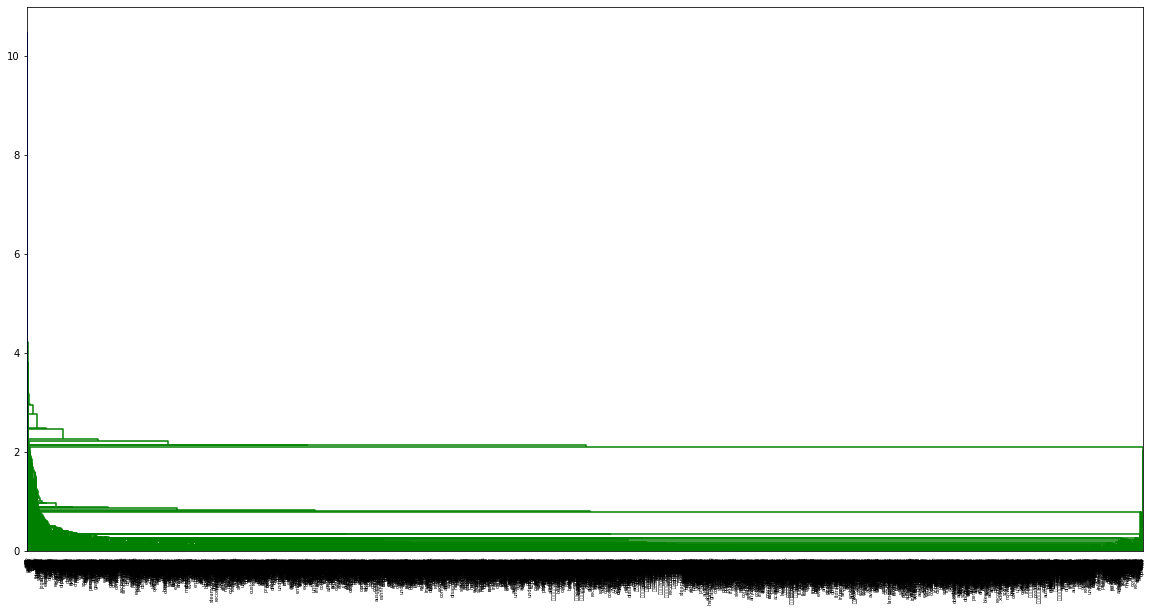

In [25]:

linked = linkage(new_embeddings, 'single')

labelList = sub_vocab

plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()


In [26]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', 
                                linkage='ward')
model.fit(new_embeddings)
labels = model.labels_
labels

array([2, 2, 2, ..., 1, 1, 4])

In [27]:
new_embeddings.shape

(10000, 2)

In [28]:
len(labels)

10000

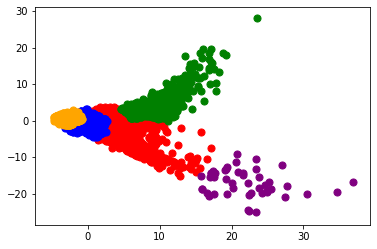

In [29]:
X = new_embeddings
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()